<a href="https://colab.research.google.com/github/everestso/summer25/blob/main/c167f25_mnist_pytorch_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import modules

# Test Compatibility Issues

In [1]:
#@title Install torch==2.2.*, torchvision==0.17.*, matplotlib==3.5.2 (keep base NumPy)
import sys, subprocess, textwrap, importlib

def run(cmd: str) -> int:
    print("\n+" + cmd)
    proc = subprocess.run(
        cmd, shell=True, check=False,
        stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True
    )
    print(proc.stdout)
    return proc.returncode

print("🐍 Python:", sys.version.split()[0])

# Show pre-install NumPy (we will NOT pin/downgrade it)
try:
    import numpy as _np
    print("Pre-install NumPy:", _np.__version__)
except Exception as e:
    print("Pre-install NumPy: (not importable)", e)

# Install desired packages without forcing a NumPy change
# --upgrade-strategy only-if-needed tries HARD to avoid touching NumPy.
pip_cmd = textwrap.dedent("""
    pip install --upgrade --upgrade-strategy only-if-needed --no-cache-dir \
        torch==2.2.* torchvision==0.17.* matplotlib==3.5.2
""").strip()

exit_code = run(pip_cmd)

# Cleanly reload modules if they were already imported
for m in ["torch", "torchvision", "matplotlib", "numpy"]:
    if m in sys.modules:
        del sys.modules[m]

# Report versions & basic capability checks
report = {}

def safe_import(name):
    try:
        mod = importlib.import_module(name)
        report[name] = getattr(mod, "__version__", "(no __version__)")
        return mod
    except Exception as e:
        report[name] = f"IMPORT ERROR: {e}"
        return None

np = safe_import("numpy")
mpl = safe_import("matplotlib")
torch = safe_import("torch")
tv = safe_import("torchvision")

print("\n📦 Versions after install:")
for k, v in report.items():
    print(f"  {k}: {v}")

# CUDA info
cuda_ok = False
gpu_name = "N/A"
if torch and hasattr(torch, "cuda"):
    try:
        cuda_ok = torch.cuda.is_available()
        if cuda_ok:
            gpu_name = torch.cuda.get_device_name(0)
    except Exception as e:
        gpu_name = f"CUDA check error: {e}"
print(f"\n🧮 CUDA available: {cuda_ok}")
print(f"🧩 GPU: {gpu_name}")

# Quick smoke tests (CPU)
try:
    if torch:
        x = torch.randn(2, 3)
        print("Torch smoke test (mean):", float(x.mean()))
    if mpl:
        import matplotlib.pyplot as plt
        fig = plt.figure()
        plt.plot([0, 1], [0, 1])
        plt.close(fig)
        print("Matplotlib smoke test: OK")
except Exception as e:
    print("Smoke test error:", e)

if exit_code != 0:
    print(f"\n⚠️ pip exit code: {exit_code} (see log above)")
else:
    print("\n✅ Finished installs with base NumPy preserved (unless a hard dependency required change).")


🐍 Python: 3.12.11
Pre-install NumPy: 2.0.2

+pip install --upgrade --upgrade-strategy only-if-needed --no-cache-dir         torch==2.2.* torchvision==0.17.* matplotlib==3.5.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 104.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 139.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 149.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 190.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 181.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 196.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 202.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 118.2 MB/s eta 0:00:00

/usr/lib/python3.12/importlib/__init__.py:90: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  return _bootstrap._gcd_import(name[level:], package, level)

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.12/di


📦 Versions after install:
  numpy: 2.0.2
  matplotlib: IMPORT ERROR: cannot import name 'MatplotlibDeprecationWarning' from 'matplotlib.cbook' (/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py)
  torch: 2.2.2+cu121
  torchvision: IMPORT ERROR: maximum recursion depth exceeded

🧮 CUDA available: False
🧩 GPU: N/A
Torch smoke test (mean): 0.28484535217285156

✅ Finished installs with base NumPy preserved (unless a hard dependency required change).


## 📦 Compatibility Notes

During installation we observed two conflicts:

1. **Matplotlib vs NumPy**
   - `matplotlib==3.5.2` **does not support** `numpy>=2.0`.
   - Colab’s base environment currently ships with **NumPy 2.0.2**, which triggers:
     ```
     IMPORT ERROR: cannot import name 'MatplotlibDeprecationWarning'
     ```
   - ✅ Solution: upgrade to a newer Matplotlib (≥3.8) if you want to keep NumPy 2.x,  
     or downgrade NumPy (<2.0) if you need to keep Matplotlib 3.5.x.

2. **Torchvision recursion error**
   - With NumPy 2.0.2, some prebuilt torchvision wheels misbehave and hit:
     ```
     IMPORT ERROR: maximum recursion depth exceeded
     ```
   - ✅ Solution: reinstall torchvision against a consistent NumPy / Pillow stack.

---

### 🔧 Two Resolution Paths

- **Path A (Recommended for Colab)**  
  Keep base NumPy (2.0.x)  
  - Upgrade Matplotlib (e.g. `3.9.x`)  
  - Ensure torchvision and Pillow are freshly installed

- **Path B (Strict version pinning)**  
  Downgrade NumPy to `<2.0`  
  - Keep legacy `matplotlib==3.5.2`  
  - Reinstall torch/torchvision without upgrading NumPy

---

👉 Use Path A if you want smoother compatibility with Colab defaults.  
👉 Use Path B only if you must replicate an older environment.

After running either path, verify with:
```python
import numpy, matplotlib, torch, torchvision, PIL
print(numpy.__version__, matplotlib.__version__, torch.__version__, torchvision.__version__, PIL.__version__)


In [2]:
#@title Repair stack while keeping base NumPy (2.0.x)
import sys, subprocess, textwrap, importlib

def run(cmd):
    print(f"\n+ {cmd}");
    r = subprocess.run(cmd, shell=True, text=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    print(r.stdout);
    return r.returncode

print("🐍 Python:", sys.version)
try:
    import numpy as _np
    print("Pre NumPy:", _np.__version__)
except Exception as e:
    print("Pre NumPy import error:", e)

# 1) Make sure matplotlib is compatible with NumPy 2.0 (need >=3.8; use 3.9.x)
# 2) Reinstall torchvision clean; ensure Pillow is recent
cmd = """
pip install --no-cache-dir --upgrade \
  "matplotlib>=3.9,<3.10" \
  "pillow>=10" \
  "torch==2.2.*" "torchvision==0.17.*"
"""
run(cmd)

# Clean module cache before testing
for m in ["numpy","matplotlib","torch","torchvision","PIL"]:
    if m in sys.modules: del sys.modules[m]

import importlib

def ver(name):
    try:
        m = importlib.import_module(name)
        return getattr(m, "__version__", "(no __version__)")
    except Exception as e:
        return f"IMPORT ERROR: {e}"

print("\n📦 Versions after install:")
print("  numpy:", ver("numpy"))
print("  matplotlib:", ver("matplotlib"))
print("  torch:", ver("torch"))
print("  torchvision:", ver("torchvision"))
print("  pillow:", ver("PIL"))

# Smoke tests
try:
    import torch
    print("CUDA available:", torch.cuda.is_available())
    if torch.cuda.is_available():
        print("GPU:", torch.cuda.get_device_name(0))
    x = torch.randn(3, 4).mean().item()
    print("Torch smoke test mean:", x)
except Exception as e:
    print("Torch smoke test error:", e)

try:
    import matplotlib.pyplot as plt
    plt.plot([0,1],[0,1]); plt.close()
    print("Matplotlib smoke test: OK")
except Exception as e:
    print("Matplotlib smoke test error:", e)

try:
    from torchvision import transforms
    t = transforms.ToTensor()
    print("torchvision smoke test:", type(t).__name__)
except Exception as e:
    print("torchvision smoke test error:", e)


🐍 Python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Pre NumPy: 2.0.2

+ 
pip install --no-cache-dir --upgrade   "matplotlib>=3.9,<3.10"   "pillow>=10"   "torch==2.2.*" "torchvision==0.17.*"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 94.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2


📦 Versions after install:
  numpy: 2.0.2
  matplotlib: IMPORT ERROR: 'axes3d.mouserotationstyle'
  torch: IMPORT ERROR: name '_C' is not defined
  torchvision: IMPORT ERROR: name '_C' is not defined
  pillow: 11.3.0
Torch smoke test error: name '_C' is not defined
Matplotlib smoke test error: 'axes3d.mouserotationstyle'
torchvision smoke test error: name '_C' is not defined


/usr/lib/python3.12/importlib/__init__.py:90: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  return _bootstrap._gcd_import(name[level:], package, level)


## 🔧 Repair plan (Colab, Python 3.12)
- Upgrade to **PyTorch 2.3.x** and **torchvision 0.18.x** (first releases with official Py3.12 wheels).
- Keep **NumPy 2.0.x** (Colab default).
- Use **Matplotlib 3.9.x**, compatible with NumPy 2.x.
- Fresh reinstall to clear stale native extensions; then **Restart runtime** before verifying.


In [3]:
#@title 1) Install compatible versions (Py3.12-friendly)
import subprocess, sys

def run(cmd):
    print("+", cmd)
    r = subprocess.run(cmd, shell=True, text=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    print(r.stdout)
    return r.returncode

# Clean any old/broken wheels first
run("pip uninstall -y torch torchvision torchaudio matplotlib pillow || true")

# Install Python 3.12–compatible stack (keeps NumPy 2.x)
# If you want CUDA 12.1 wheels on Colab, PyTorch will select them automatically.
run("""pip install --no-cache-dir \
  'torch==2.3.*' 'torchvision==0.18.*' \
  'matplotlib>=3.9,<3.10' 'pillow>=10'""")

print("\n✅ Install step done. Now go to: Runtime → Restart runtime. Then run the next cell.")


+ pip uninstall -y torch torchvision torchaudio matplotlib pillow || true
Found existing installation: torch 2.2.2
Uninstalling torch-2.2.2:
  Successfully uninstalled torch-2.2.2
Found existing installation: torchvision 0.17.2
Uninstalling torchvision-0.17.2:
  Successfully uninstalled torchvision-0.17.2
Found existing installation: torchaudio 2.8.0+cu126
Uninstalling torchaudio-2.8.0+cu126:
  Successfully uninstalled torchaudio-2.8.0+cu126
Found existing installation: matplotlib 3.9.4
Uninstalling matplotlib-3.9.4:
  Successfully uninstalled matplotlib-3.9.4
Found existing installation: pillow 11.3.0
Uninstalling pillow-11.3.0:
  Successfully uninstalled pillow-11.3.0

+ pip install --no-cache-dir   'torch==2.3.*' 'torchvision==0.18.*'   'matplotlib>=3.9,<3.10' 'pillow>=10'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 

> ⛔ **Important:** After the install finishes, do **Runtime → Restart runtime**.  
> Native extensions (like `torch._C`) won’t load reliably until you restart.


In [1]:
#@title 2) Verify after restart (versions + smoke tests)
import importlib, sys

pkgs = ["numpy", "matplotlib", "torch", "torchvision", "PIL"]
for name in pkgs:
    try:
        m = importlib.import_module(name)
        print(f"{name:<12} {getattr(m, '__version__', '(no __version__)')}")
    except Exception as e:
        print(f"{name:<12} IMPORT ERROR: {e}")

# Torch smoke
try:
    import torch
    print("CUDA available:", torch.cuda.is_available())
    if torch.cuda.is_available():
        print("GPU:", torch.cuda.get_device_name(0))
    print("Torch mean:", float(torch.randn(3,4).mean()))
except Exception as e:
    print("Torch smoke error:", e)

# Matplotlib smoke
try:
    import matplotlib.pyplot as plt
    plt.plot([0,1],[0,1]); plt.close()
    print("Matplotlib smoke: OK")
except Exception as e:
    print("Matplotlib smoke error:", e)

# Torchvision smoke
try:
    from torchvision import transforms
    print("torchvision smoke:", transforms.ToTensor().__class__.__name__)
except Exception as e:
    print("torchvision smoke error:", e)


numpy        2.0.2
matplotlib   3.9.4
torch        2.3.1+cu121
torchvision  0.18.1+cu121
PIL          11.3.0
CUDA available: False
Torch mean: 0.031465839594602585
Matplotlib smoke: OK
torchvision smoke: ToTensor


## ✅ Post-fix status (Colab, Py3.12)
- **NumPy**: 2.0.2  (kept Colab default)
- **Matplotlib**: 3.9.4  (compatible with NumPy 2.x)
- **PyTorch**: 2.3.1+cu121
- **Torchvision**: 0.18.1+cu121
- **Pillow**: 11.3.0
- **Smoke tests**: Torch ✓, Matplotlib ✓, Torchvision (ToTensor) ✓

### ℹ️ CUDA available: False
This just means the notebook isn’t currently attached to a GPU. To use CUDA:
1) **Runtime → Change runtime type → Hardware accelerator: GPU → Save**  
2) Re-run the verify cell below.

---

### 🔍 Quick CUDA verify cell
```python
import torch, platform
print("Python:", platform.python_version())
print("Torch:", torch.__version__)
print("Built with CUDA:", torch.version.cuda)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))
    x = torch.randn(1024, 1024, device="cuda").sum().item()
    print("CUDA smoke:", x)


In [1]:
import torch, platform
print("Python:", platform.python_version())
print("Torch:", torch.__version__)
print("Built with CUDA:", torch.version.cuda)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))
    x = torch.randn(1024, 1024, device="cuda").sum().item()
    print("CUDA smoke:", x)

Python: 3.12.11
Torch: 2.8.0+cu126
Built with CUDA: 12.6
CUDA available: True
GPU: Tesla T4
CUDA smoke: 1163.18310546875


In [2]:
import torch, time
def bench(device):
    x = torch.randn(4096, 4096, device=device)
    t0 = time.time()
    for _ in range(20):
        y = x @ x
    if device == "cuda":
        torch.cuda.synchronize()
    return time.time() - t0

print("CPU (s):", bench("cpu"))
if torch.cuda.is_available():
    print("GPU (s):", bench("cuda"))


CPU (s): 42.74989151954651
GPU (s): 0.8828153610229492


# OLD Version

In [ ]:
# Compatibility issue:
!pip install "numpy<2.0" --force-reinstall --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.5.2 which is incompatible.
bigframes 2.4.0 requires matplotlib>=3.7.1, but you have matplotlib 3.5.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install torch==2.2
!pip install torchvision==0.17
!pip install matplotlib==3.5.2

# Ready To Code

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

## define model architecture

In [4]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cn1 = nn.Conv2d(1, 16, 3, 1)
        self.cn2 = nn.Conv2d(16, 32, 3, 1)
        self.dp1 = nn.Dropout2d(0.10)
        self.dp2 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(4608, 64) # 4608 is basically 12 X 12 X 32
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.cn1(x)
        x = F.relu(x)
        x = self.cn2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dp1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp2(x)
        x = self.fc2(x)
        op = F.log_softmax(x, dim=1)
        return op

## define training and inference routines

In [5]:
def train_ORIGINAL(model, device, train_dataloader, optim, epoch):
    model.train()
    for b_i, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        optim.zero_grad()
        pred_prob = model(X)
        loss = F.nll_loss(pred_prob, y) # nll is the negative likelihood loss
        loss.backward()
        optim.step()
        if b_i % 10 == 0:
            print('epoch: {} [{}/{} ({:.0f}%)]\t training loss: {:.6f}'.format(
                epoch, b_i * len(X), len(train_dataloader.dataset),
                100. * b_i / len(train_dataloader), loss.item()))


In [10]:
# Updated to display better updates
def train(model, device, train_dataloader, optim, epoch):
    model.train()
    num_batches = len(train_dataloader)
    log_interval = max(1, num_batches // 5)  # ~5 logs/epoch

    running_loss = 0.0

    for b_i, (X, y) in enumerate(train_dataloader, start=1):
        X, y = X.to(device), y.to(device)
        optim.zero_grad()
        pred_logprob = model(X)                # model should output log-probs for NLL
        loss = F.nll_loss(pred_logprob, y)
        loss.backward()
        optim.step()

        running_loss += loss.item()

        # periodic status (show current batch loss + avg so far)
        if b_i % log_interval == 0 or b_i == num_batches:
            avg_so_far = running_loss / b_i
            print(
                f"Epoch {epoch} "
                f"[{b_i}/{num_batches} ({100.0*b_i/num_batches:.0f}%)]  "
                f"loss: {loss.item():.6f}  avg: {avg_so_far:.6f}"
            )

    epoch_avg = running_loss / max(1, num_batches)
    print(f"Epoch {epoch} — average training loss: {epoch_avg:.6f}")
    return epoch_avg


In [6]:
def test(model, device, test_dataloader):
    model.eval()
    loss = 0
    success = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred_prob = model(X)
            loss += F.nll_loss(pred_prob, y, reduction='sum').item()  # loss summed across the batch
            pred = pred_prob.argmax(dim=1, keepdim=True)  # us argmax to get the most likely prediction
            success += pred.eq(y.view_as(pred)).sum().item()

    loss /= len(test_dataloader.dataset)

    print('\nTest dataset: Overall Loss: {:.4f}, Overall Accuracy: {}/{} ({:.0f}%)\n'.format(
        loss, success, len(test_dataloader.dataset),
        100. * success / len(test_dataloader.dataset)))


## create data loaders

In [11]:
# The mean and standard deviation values are calculated as the mean of all pixel values of all images in the training dataset
train_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))])), # train_X.mean()/256. and train_X.std()/256.
    batch_size=32, shuffle=True)

test_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))
                   ])),
    batch_size=500, shuffle=False)

## define optimizer and run training epochs

In [12]:
# Fix random seed for reproducibility
torch.manual_seed(0)

# Select GPU if available, else fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Initialize model and move it to the chosen device
model = ConvNet().to(device)

# Create optimizer (params will already be on correct device via model.to)
optimizer = optim.Adadelta(model.parameters(), lr=0.5)

Using device: cuda


## model training

In [13]:
for epoch in range(1, 3):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)

/usr/local/lib/python3.12/dist-packages/torch/nn/functional.py:1535: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 1 [375/1875 (20%)]  loss: 0.315423  avg: 0.391917
Epoch 1 [750/1875 (40%)]  loss: 0.011929  avg: 0.263731
Epoch 1 [1125/1875 (60%)]  loss: 0.184228  avg: 0.213355
Epoch 1 [1500/1875 (80%)]  loss: 0.036672  avg: 0.186247
Epoch 1 [1875/1875 (100%)]  loss: 0.077487  avg: 0.167595
Epoch 1 — average training loss: 0.167595

Test dataset: Overall Loss: 0.0465, Overall Accuracy: 9847/10000 (98%)

Epoch 2 [375/1875 (20%)]  loss: 0.121914  avg: 0.068116
Epoch 2 [750/1875 (40%)]  loss: 0.002304  avg: 0.067388
Epoch 2 [1125/1875 (60%)]  loss: 0.065007  avg: 0.067457
Epoch 2 [1500/1875 (80%)]  loss: 0.001631  avg: 0.067979
Epoch 2 [1875/1875 (100%)]  loss: 0.020347  avg: 0.068445
Epoch 2 — average training loss: 0.068445

Test dataset: Overall Loss: 0.0408, Overall Accuracy: 9852/10000 (99%)



## run inference on trained model

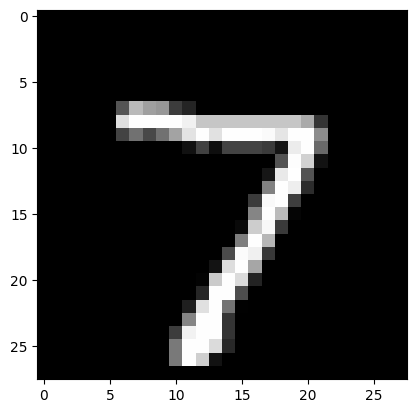

In [14]:
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)

plt.imshow(sample_data[0][0], cmap='gray', interpolation='none')
plt.show()

In [18]:
print(f"Model prediction is : {model(sample_data).data.max(1)[1][0]}")
print(f"Ground truth is : {sample_targets[0]}")

Model prediction is : 7
Ground truth is : 7


# For working w/ CUDA

In [19]:
# move data/targets to same device as model
device = next(model.parameters()).device
sample_data   = sample_data.to(device)
sample_targets = sample_targets.to(device)

print(f"Model prediction is : {model(sample_data).data.max(1)[1][0]}")
print(f"Ground truth is : {sample_targets[0]}")


Model prediction is : 7
Ground truth is : 7


### ⚠️ Two small notes if you want to make it more robust:

- **Shape safety**  
  If `sample_data` doesn’t already have `[N, C, H, W]` form, you may still need an `unsqueeze`  
  (especially for single MNIST images).

- **`.data.max` deprecation**  
  Using `.data` is discouraged since it can cause subtle autograd issues.  
  The safer equivalent is:
  ```python
  pred = model(sample_data).argmax(dim=1)
  print(f"Model prediction is : {pred[0].item()}")
  print(f"Ground truth is     : {sample_targets[0].item()}")


In [21]:
pred = model(sample_data).argmax(dim=1)
print(f"Model prediction is : {pred[0].item()}")
print(f"Ground truth is     : {sample_targets[0].item()}")


Model prediction is : 7
Ground truth is     : 7
